# Sentiment Analysis (Assignment 7)

## Student: Rodolfo Lerma

This assignment requires that you build a sentiment analysis classifier for a series of tweets.
The data consists of a file "twitter_data.csv". The file contains 16,000 tweets with their respective score. The attributes are the sentences, and the score is either 4 (for positive) or 0 (for negative).

In [6]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Imports
import csv
import string
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from nltk.corpus import stopwords
from scipy.sparse import coo_matrix
from scipy.stats import uniform
from collections import Counter
import argparse
import pprint
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mam_0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mam_0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Read files
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/twitter_data.csv"
df = pd.read_csv(url, sep=",")
df.columns = ["sentiment_label","tweet_text"]
    
print(df.head())

   sentiment_label                                         tweet_text
0                4  @elephantbird Hey dear, Happy Friday to You  A...
1                4  Ughhh layin downnnn    Waiting for zeina to co...
2                0  @greeniebach I reckon he'll play, even if he's...
3                0              @vaLewee I know!  Saw it on the news!
4                0  very sad that http://www.fabchannel.com/ has c...


Question 1: Generate word cloud for positive sentiment.

In [3]:
def preprocess(text, list_of_steps):
    for step in list_of_steps:
        if step == 'remove_non_ascii':
            text = ''.join([x for x in text if ord(x) < 128])
        elif step == 'lowercase':
            text = #TODO
        elif step == 'remove_punctuation':
            punct_exclude = set(string.punctuation)
            text = ''.join(char for char in text if char not in punct_exclude)
        elif step == 'remove_numbers':
            text = #TODO
        elif step == 'remove_stopwords':
            stops = #TODO
            word_list = text.split(' ')
            text_words = [word for word in word_list if word not in stops]
            text = ' '.join(text_words)
        elif step == 'stem_words':
            lmtzr = WordNetLemmatizer()
            word_list = #TODO
            stemmed_words = #TODO
            text = ' '.join(stemmed_words)
        elif step == 'strip_whitespace':
            text = ' '.join(text.split())
    return text

steps = ['remove_non_ascii', 'lowercase', 'remove_punctuation', 'remove_numbers',
            'strip_whitespace', 'remove_stopwords', 'stem_words']

df['clean_tweet']=df['tweet_text'].apply(lambda s: preprocess(s, steps))
pos_clean_string=','.join(df.loc[df['sentiment_label']==4, :]['clean_tweet'])
wordcloud=WordCloud(max_words=50,width=2500,height=1500,background_color='black',stopwords=STOPWORDS).generate(pos_clean_string)# plot wordcloud objectfig=plt.figure(figsize=(20,10),facecolor='k',edgecolor='k')plt.imshow(wordcloud, interpolation='bilinear')plt.axis('off')plt.tight_layout(pad=0)plt.show()


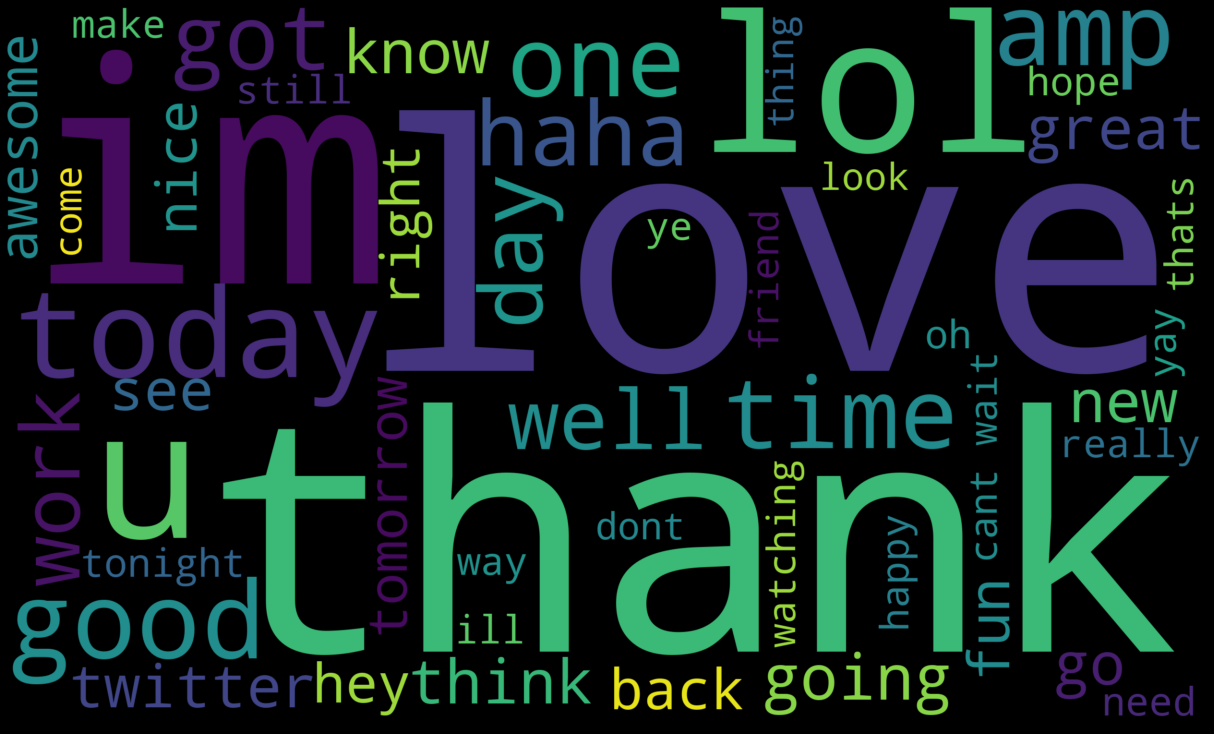

In [4]:
#plot wordcloud object
fig = plt.figure(
figsize = (20, 10),
facecolor = 'k',
edgecolor = 'k')
plt.imshow(wordcloud, interpolation = #TODO)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Question 2: Generate word cloud for negative sentiment.

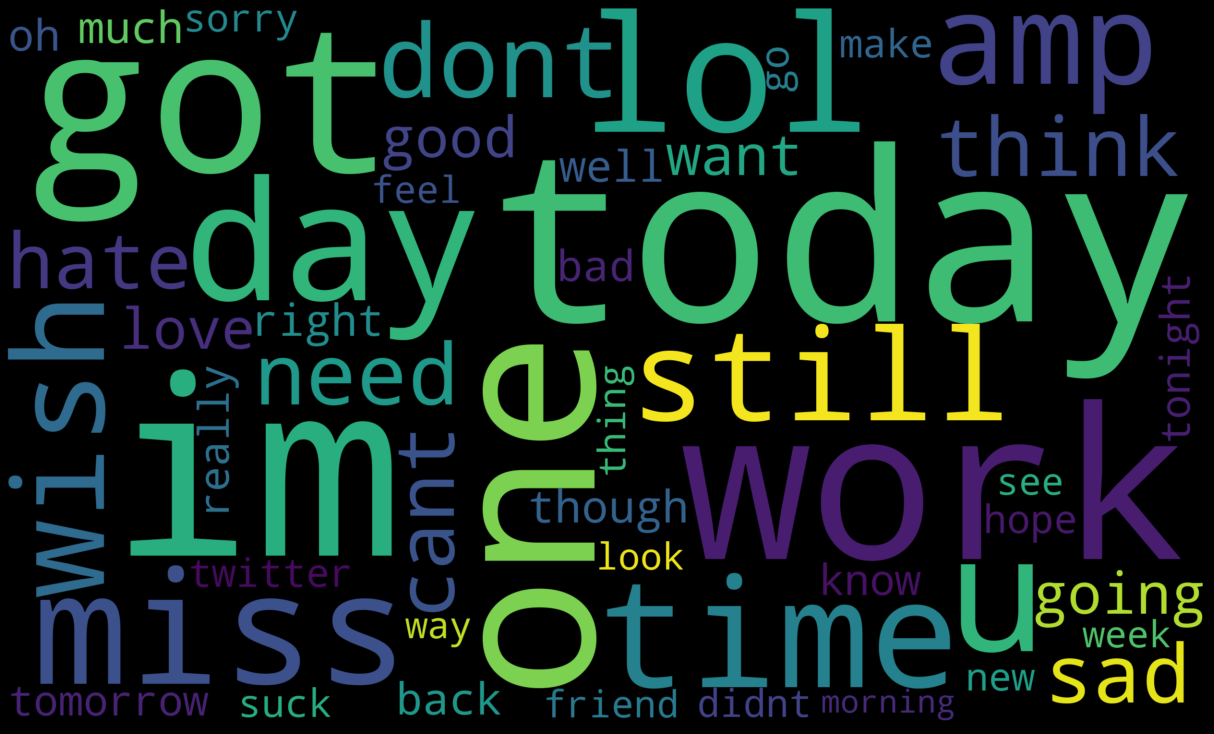

In [5]:
# join entire clean_tweet column
neg_clean_string = ','.join(df.loc[df['sentiment_label'] == 0, :]['clean_tweet'])
# create wordcloud object
wordcloud = WordCloud(
max_words=50,
width = 2500,
height = 1500,
background_color = 'black',
stopwords = STOPWORDS).generate(#TODO)
# plot wordcloud object
fig = plt.figure(
figsize = (20, 10),
facecolor = 'k',
edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Question 3: Split data where test size = 40000, random_state = 42. Max_df=0.5, max_features = 6228,

In [8]:
# Declare the TFIDF vectorizer.
vectorizer = TfidfVectorizer(sublinear_tf=True, #TODO, stop_words=#TODO)
# Fit the vectorizer over the dataset
clean_texts = df['clean_tweet']
tf_idf_tweets = vectorizer.fit_transform(clean_texts)
# split the data
y_targets = np.array(df['sentiment_label'])
X_train, X_test, y_train, y_test = #TODO

Question 4: Build a classifier that classifies the sentiment of a sentence. Criteria - loss = modified_huber, learning_rate = adaptive, peanlty = elasticnet, set an alpha and eta as well.

In [9]:
model = SGDClassifier(#TODO)
model.fit(X_train, y_train)

SGDClassifier(alpha=2.9e-05, eta0=0.00164, learning_rate='adaptive',
              loss='modified_huber', penalty='elasticnet')

Question 5: What is the accuracy of your model when applied to testing data?

In [10]:
score = #TODO
print("Model Score:", score)

Model Score: 0.754975


Question 6: What conclusions can you draw from the model?

Our model appears to perform decently, but not great and is better at predicting negative senti-
ment than it does positive sentiment. Our model could be better at predicting positive sentiment
because it more often predict positive sentiment than negative.

[Bonus] Question 7: If you are to build a sentiment analysis model, would it be dependent on the source of data?

Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.